# Installation

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn joblib

# 1.Setup and Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files

# 2.Upload Dataset

In [6]:
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded.keys())))

Saving score.csv to score (2).csv


# 3.Data Exploring and Visualization


First 5 rows:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Last 5 rows:
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
\Statistics of Dataset
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


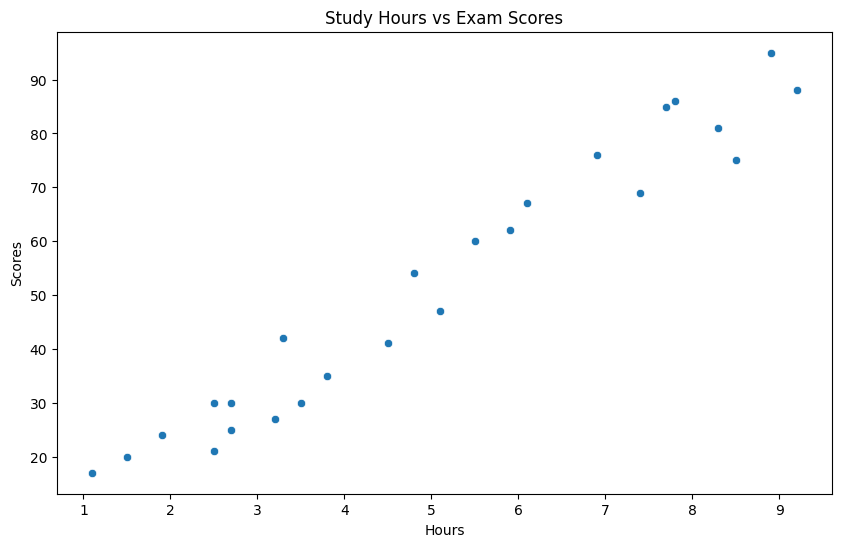

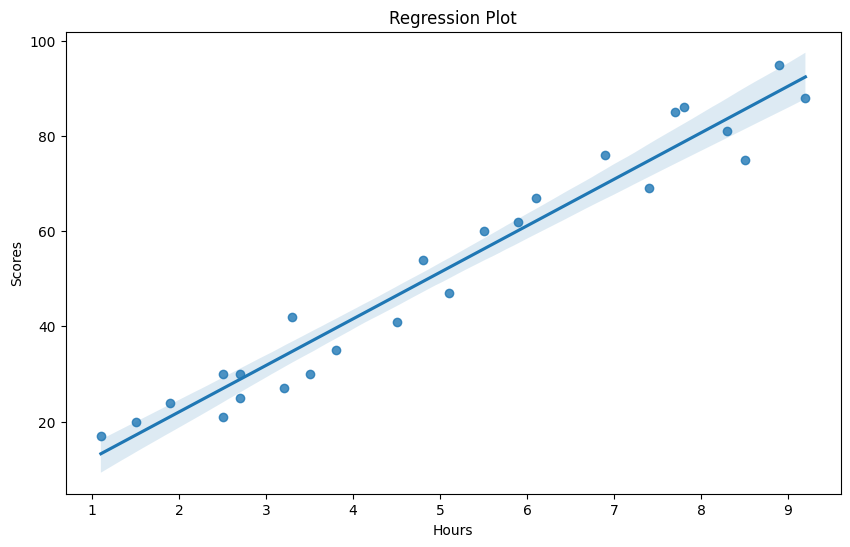

In [7]:
print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nDataset info:")
print(df.info())

print("\Statistics of Dataset")
print(df.describe())

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Study Hours vs Exam Scores')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Hours', y='Scores', data=df)
plt.title('Regression Plot')
plt.show()

# 4. Data Preparation and Evaluation

In [8]:
# Prepare Data
X = df[['Hours']].values
y = df['Scores'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"\nR² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² Score: 0.97
RMSE: 4.35


# 5. Result Visualization

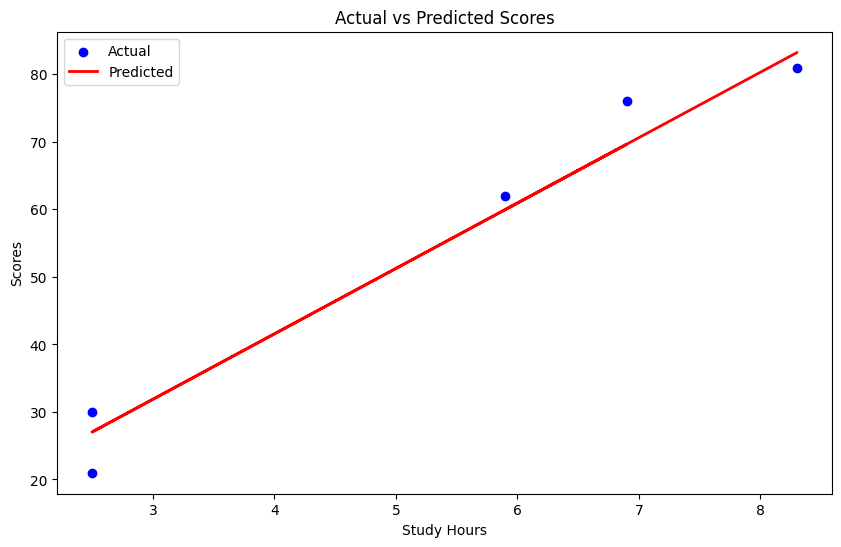

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


# 6. Prediction Function

In [10]:
def predict_score():
    hours = float(input("Enter study hours: "))
    prediction = model.predict([[hours]])
    print(f"\nPredicted Score for {hours} hours: {prediction[0]:.2f}")

predict_score()

Enter study hours: 6.0

Predicted Score for 6.0 hours: 60.92
